In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
sp.init_printing()

In [2]:
E, sig_0, gamma = sp.symbols(r'E,\sigma_0,\gamma', nonnegative=True)
K = sp.Symbol(r'K')
eps, eps_p, alpha, z = sp.symbols(
    r'\varepsilon, \varepsilon_\mathrm{p}, \alpha, z'
)
dot_eps, dot_eps_p, dot_alpha, dot_z = sp.symbols(
    r'\dot{\varepsilon}, \dot{\varepsilon}_\mathrm{p}, \dot{\alpha}, \dot{z}'
)
sig, sig_p, X, Z = sp.symbols(
    r'\sigma, \sigma_\mathrm{p}, X, Z'
)
dot_lambda = sp.Symbol(r'\dot{\lambda}')

In [3]:
D_pl_diss = sp.Symbol(r'\mathcal{D}')

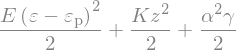

In [4]:
rho_psi = (
    sp.Rational(1/2) * E * (eps-eps_p)**2 + 
    sp.Rational(1/2) * gamma * alpha**2 +
    sp.Rational(1/2) * K * z**2
)
rho_psi

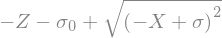

In [5]:
f = sp.sqrt((sig-X)**2) - sig_0 - Z
f

In [6]:
sp.solve(f,sig)

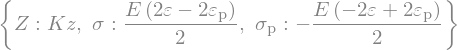

In [7]:
SV = {eps,eps_p, z}
subs_TF = {
    sig: rho_psi.diff(eps),
    sig_p: -rho_psi.diff(eps_p),
    Z: rho_psi.diff(z)
}
subs_TF

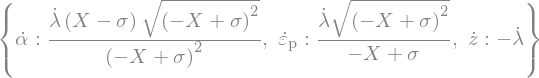

In [8]:
subs_evol = {
    dot_eps_p : dot_lambda * f.diff(sig),
    dot_alpha : dot_lambda * f.diff(X),
    dot_z : dot_lambda * f.diff(Z)
}
subs_evol

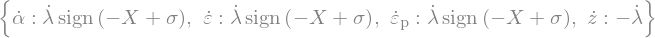

In [9]:
evol = {
    dot_eps : dot_lambda * sp.sign(sig-X),
    dot_eps_p : dot_lambda * sp.sign(sig-X),
    dot_alpha : dot_lambda * sp.sign(sig-X),
    dot_z : dot_lambda * f.diff(Z)
}
evol

In [10]:
subs_dot_lambda = {dot_lambda : sp.sign(sig-X) * E / ( E + K ) * dot_eps}
subs_dot_lambda

In [11]:
D_pl = sig * dot_eps_p - X * dot_alpha - Z * dot_z
D_pl

In [12]:
D_pl_lambda = D_pl.subs(evol)
D_pl_lambda

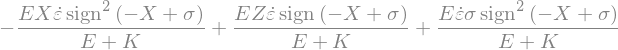

In [13]:
D_pl_SV = D_pl_lambda.subs(subs_dot_lambda)
D_pl_SV

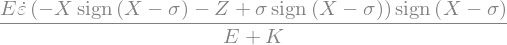

In [14]:
sp.simplify(D_pl_SV)